 Practical no.: 2
 Classify the email using the binary classification method. Email Spam detection has two states:
 a) Normal State– Not Spam, b) Abnormal State– Spam. Use K-Nearest Neighbors and Support
 Vector Machine for classification. Analyze their performance. Dataset link: The emails.csv dataset
 on the Kaggle https://www.kaggle.com/datasets/balaka18/email-spam-classification-dataset-csv

In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('emails.csv')

In [5]:
df

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,Email 167,0,1,1,0,0,0,6,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
167,Email 168,2,2,2,1,5,1,24,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
168,Email 169,10,9,3,2,3,3,38,3,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
169,Email 170,1,0,1,0,0,1,23,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [6]:
df.shape

(171, 3002)

In [7]:
df.isnull().sum()

,0
Email No.,0
the,0
to,0
ect,0
and,0
...,...
military,1
allowing,1
ff,1
dry,1


In [8]:
df.describe()
#desrib the dataset of

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
count,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,...,170.0,170.000000,170.0,170.000000,170.0,170.0,170.0,170.000000,170.0,170.000000
mean,6.187135,5.807018,5.251462,2.690058,3.122807,2.298246,53.257310,2.116959,2.105263,9.684211,...,0.0,0.005882,0.0,0.088235,0.0,0.0,0.0,0.911765,0.0,0.276471
std,8.940987,7.750761,9.133708,4.345771,4.171628,4.279767,65.237786,3.714567,4.651442,14.140253,...,0.0,0.076696,0.0,0.623392,0.0,0.0,0.0,1.560755,0.0,0.448574
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000
25%,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,15.500000,0.000000,0.000000,1.500000,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000
50%,3.000000,3.000000,2.000000,1.000000,2.000000,1.000000,30.000000,1.000000,0.000000,5.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000
75%,7.500000,7.500000,4.500000,3.000000,4.000000,2.500000,55.000000,2.000000,2.000000,11.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,1.000000,0.0,1.000000
max,60.000000,53.000000,62.000000,23.000000,25.000000,33.000000,387.000000,25.000000,27.000000,97.000000,...,0.0,1.000000,0.0,6.000000,0.0,0.0,0.0,8.000000,0.0,1.000000


In [9]:
df = df.dropna()
#droping the two null or all the null value

In [10]:
df.isnull().sum()
# after droping the null there is no null value

,0
Email No.,0
the,0
to,0
ect,0
and,0
...,...
military,0
allowing,0
ff,0
dry,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 170 entries, 0 to 169
Columns: 3002 entries, Email No. to Prediction
dtypes: float64(2382), int64(619), object(1)
memory usage: 3.9+ MB


In [12]:
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [13]:
df.tail()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
165,Email 166,2,1,1,0,0,3,33,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
166,Email 167,0,1,1,0,0,0,6,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
167,Email 168,2,2,2,1,5,1,24,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
168,Email 169,10,9,3,2,3,3,38,3,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
169,Email 170,1,0,1,0,0,1,23,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [14]:
df.describe()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,...,170.0,170.000000,170.0,170.000000,170.0,170.0,170.0,170.000000,170.0,170.000000
mean,6.100000,5.705882,5.276471,2.641176,3.076471,2.294118,52.823529,2.129412,2.111765,9.629412,...,0.0,0.005882,0.0,0.088235,0.0,0.0,0.0,0.911765,0.0,0.276471
std,8.894284,7.659659,9.154818,4.311202,4.139581,4.292069,65.182707,3.721959,4.664404,14.163804,...,0.0,0.076696,0.0,0.623392,0.0,0.0,0.0,1.560755,0.0,0.448574
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000
25%,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,15.250000,0.000000,0.000000,1.250000,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000
50%,3.000000,3.000000,2.000000,1.000000,2.000000,1.000000,30.000000,1.000000,0.000000,5.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000
75%,7.000000,7.000000,4.750000,3.000000,4.000000,2.000000,54.250000,2.000000,2.000000,11.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,1.000000,0.0,1.000000
max,60.000000,53.000000,62.000000,23.000000,25.000000,33.000000,387.000000,25.000000,27.000000,97.000000,...,0.0,1.000000,0.0,6.000000,0.0,0.0,0.0,8.000000,0.0,1.000000


In [15]:
df.dtypes

,0
Email No.,object
the,int64
to,int64
ect,int64
and,int64
...,...
military,float64
allowing,float64
ff,float64
dry,float64


In [16]:
df = df.drop('Email No.', axis = 1)

In [17]:
df.dtypes

,0
the,int64
to,int64
ect,int64
and,int64
for,int64
...,...
military,float64
allowing,float64
ff,float64
dry,float64


In [18]:
df.head()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,0,0,1,0,0,0,2,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,8,13,24,6,6,2,102,1,27,18,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0,0,1,0,0,0,8,0,0,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,5,22,0,5,1,51,2,10,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,7,6,17,1,5,2,57,0,9,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [19]:
df['Prediction'].value_counts()

,count
Prediction,
0.0,123
1.0,47


In [20]:
#pip install imbalanced-learn
from imblearn.over_sampling import RandomOverSampler

In [21]:
x = df.drop('Prediction', axis = 1)
#

In [22]:
x

,the,to,ect,and,for,of,a,you,hou,in,...,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry
0,0,0,1,0,0,0,2,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,8,13,24,6,6,2,102,1,27,18,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,0,1,0,0,0,8,0,0,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,5,22,0,5,1,51,2,10,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,7,6,17,1,5,2,57,0,9,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,2,1,1,0,0,3,33,1,0,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
166,0,1,1,0,0,0,6,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
167,2,2,2,1,5,1,24,2,0,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
168,10,9,3,2,3,3,38,3,0,19,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [23]:
y = df['Prediction']

In [24]:
y

,Prediction
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
165,0.0
166,1.0
167,1.0
168,0.0


In [25]:
df.describe()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,...,170.0,170.000000,170.0,170.000000,170.0,170.0,170.0,170.000000,170.0,170.000000
mean,6.100000,5.705882,5.276471,2.641176,3.076471,2.294118,52.823529,2.129412,2.111765,9.629412,...,0.0,0.005882,0.0,0.088235,0.0,0.0,0.0,0.911765,0.0,0.276471
std,8.894284,7.659659,9.154818,4.311202,4.139581,4.292069,65.182707,3.721959,4.664404,14.163804,...,0.0,0.076696,0.0,0.623392,0.0,0.0,0.0,1.560755,0.0,0.448574
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000
25%,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,15.250000,0.000000,0.000000,1.250000,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000
50%,3.000000,3.000000,2.000000,1.000000,2.000000,1.000000,30.000000,1.000000,0.000000,5.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000
75%,7.000000,7.000000,4.750000,3.000000,4.000000,2.000000,54.250000,2.000000,2.000000,11.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,1.000000,0.0,1.000000
max,60.000000,53.000000,62.000000,23.000000,25.000000,33.000000,387.000000,25.000000,27.000000,97.000000,...,0.0,1.000000,0.0,6.000000,0.0,0.0,0.0,8.000000,0.0,1.000000


In [27]:
df.corr()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
the,1.000000,0.794112,0.368965,0.752140,0.773937,0.745867,0.788797,0.633074,0.315366,0.751396,...,NaN,-0.044238,NaN,0.363377,NaN,NaN,NaN,0.504897,NaN,-0.051463
to,0.794112,1.000000,0.438692,0.767825,0.825927,0.736987,0.855238,0.510682,0.401224,0.851576,...,NaN,-0.057471,NaN,0.402012,NaN,NaN,NaN,0.593252,NaN,0.073748
ect,0.368965,0.438692,1.000000,0.295476,0.473941,0.304068,0.412246,0.250052,0.941960,0.295998,...,NaN,-0.036039,NaN,0.317113,NaN,NaN,NaN,0.124712,NaN,-0.207479
and,0.752140,0.767825,0.295476,1.000000,0.663667,0.713405,0.801240,0.574489,0.273012,0.785918,...,NaN,-0.047265,NaN,0.348707,NaN,NaN,NaN,0.490362,NaN,0.149512
for,0.773937,0.825927,0.473941,0.663667,1.000000,0.672457,0.826258,0.531644,0.407134,0.737101,...,NaN,-0.057337,NaN,0.465133,NaN,NaN,NaN,0.533157,NaN,-0.014639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
military,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
allowing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ff,0.504897,0.593252,0.124712,0.490362,0.533157,0.658428,0.688379,0.413495,0.062322,0.593541,...,NaN,-0.045070,NaN,0.226986,NaN,NaN,NaN,1.000000,NaN,0.305505
dry,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
from sklearn.model_selection import train_test_split

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=45,test_size=0.3)

In [30]:
from sklearn.neighbors import KNeighborsClassifier

In [31]:
kn = KNeighborsClassifier()

In [32]:
kn.fit(x_train, y_train)

KNeighborsClassifier()

In [33]:
y_pred = kn.predict(x_test)

In [34]:
 from sklearn.metrics import accuracy_score

In [35]:
 from sklearn.metrics import accuracy_score

In [36]:
 acc = accuracy_score(y_test, y_pred)

In [37]:
acc

0.8627450980392157

In [40]:
#Creating SVM model
from sklearn.svm import SVC

In [42]:
# Support Vector Machine
svm = SVC(kernel='linear')
svm.fit(x_train, y_train)
svm_predictions = svm.predict(x_test)

In [44]:
#Imports for Evaluation
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix, ConfusionMatrixDisplay

In [45]:
acc = accuracy_score(y_test, svm_predictions)
creport = classification_report(y_test, svm_predictions)
cm = confusion_matrix(y_test, svm_predictions)

SVM Performance:
Accuracy: 0.9215686274509803
Classification Report:
               precision    recall  f1-score   support

         0.0       0.97      0.92      0.95        39
         1.0       0.79      0.92      0.85        12

    accuracy                           0.92        51
   macro avg       0.88      0.92      0.90        51
weighted avg       0.93      0.92      0.92        51

Confusion Matrix:
 [[36  3]
 [ 1 11]]


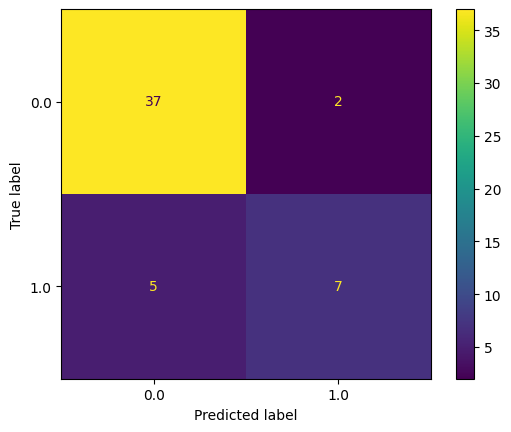

In [46]:
 #Evaluate SVM
 print("SVM Performance:")
 print("Accuracy:", acc)
 print("Classification Report:\n", creport)
 print("Confusion Matrix:\n", cm)
 print(ConfusionMatrixDisplay.from_predictions(y_test, y_pred))